1. trees.csv를 읽어들여서 아래에 대해

1) 상관관계, 다중공선성을 확인하시오
2) crossvalidation score 를 구하시오.
3) 아래의 데이터를 이용하여 Volume을 예측하시오


Girth 8.8, 10.5
Height 63, 72

2. volume이 40 이상이면 크다


30이상이면 보통 미만이면 적음으로
아래와 같이 출력하시오


volume  정도
============
 10.3    적음
...

3. Height  가 가장 작은값과 큰값을 구하시오

4. girth(테두리) 가 가장큰 top5를 구하시오(girth, height, volume)


In [56]:
## 필요한 라이브러리 import

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [57]:
# 데이터 불러오기

tree_df = pd.read_csv('trees.csv')
tree_df.head(5)

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


           Girth   Height    Volume
Girth   1.000000  0.51928  0.967119
Height  0.519280  1.00000  0.598250
Volume  0.967119  0.59825  1.000000


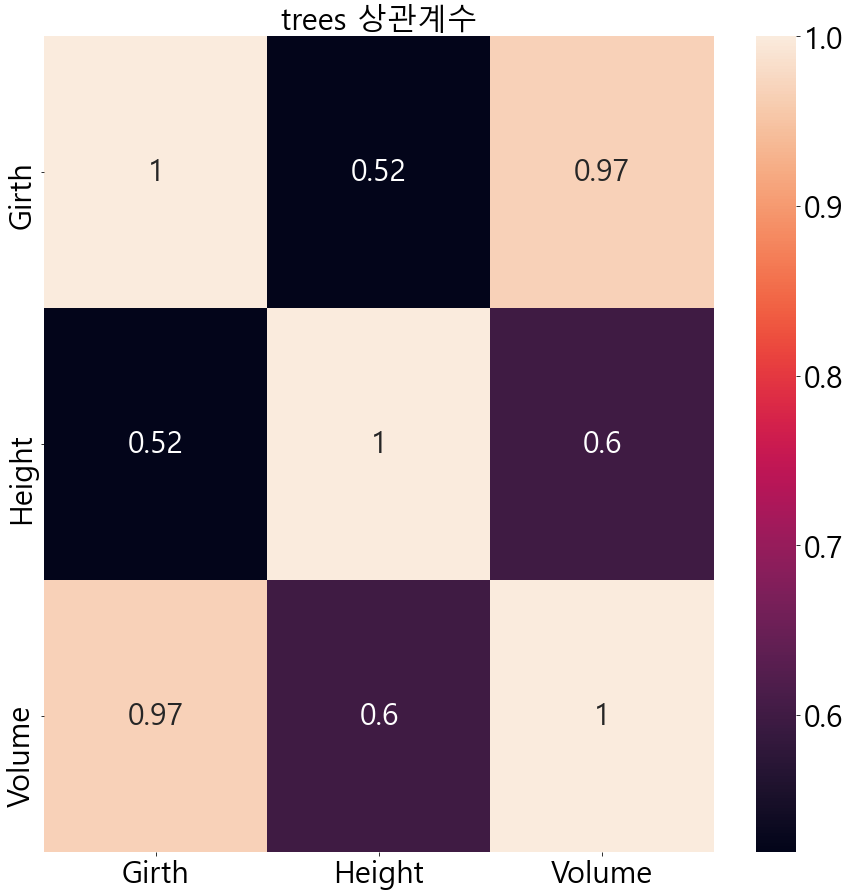

In [58]:
## 변수 상관도 구하고 시각화

tree_corr = tree_df.corr()
print(tree_corr)

plt.rc('font', size=30)
plt.figure(figsize=(15,15))
sns.heatmap(tree_df.corr(), annot=True ,annot_kws={"fontsize":30})
plt.title('trees 상관계수', fontsize=30)
plt.show()

In [59]:
# 다중 공선성 구하기

vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(tree_df.values, i )  for i in range( tree_df.shape[1] ) ]
vif['features'] = tree_df.columns
vif

,VIF Factor,features
0,158.198657,Girth
1,62.939266,Height
2,32.993875,Volume


In [60]:
# cross_validation score 구하기

x_tree = tree_df.loc[:,['Girth','Height']]
y_tree = tree_df.loc[:,['Volume']]

x_train, x_test, y_train, y_test = train_test_split(x_tree, y_tree, 
                                test_size=0.2,random_state=1)

model=make_pipeline(StandardScaler(),LinearRegression())
model.fit(x_train, y_train)


r2_scores = cross_val_score(model , x_tree , y_tree , cv =5, scoring='r2' , verbose=1)

print(r2_scores)
print(r2_scores.mean())

[-2.42679092  0.59361755 -0.14097307  0.45908741 -0.6044407 ]
-0.4238999480904351


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [73]:
# [8.8,63],[10.5,72] 로 예측

x_new = [[8.8,63],[10.5,72]]

y_predict = model.predict(x_new)

y_predict

array([[ 5.84983575],
       [16.27579072]])

In [76]:
# 2번
dict_ = {True : "크다", False : "적음" }

tree_df["정도"] = [dict_[t] for t in list(tree_df["Volume"] > 40)]
tree_df.head()
# 3 Height 가장 큰 값
tree_df['Height'].max()
# 3 Height 가장 작은 값
tree_df['Height'].min()
# 4 girth(테두리)가 가장 큰 top5
tree_df.sort_values(by=['Girth'], axis=0, ascending=False).head()

SyntaxError: unexpected EOF while parsing (<ipython-input-76-a6f4154fa7c4>, line 10)